In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the DataSet
DieselTrain=loadmat("cnDieselTrain.mat")
cnTrainX=pd.DataFrame(DieselTrain["cnTrainX"])
cnTrainX

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.006191,0.006467,0.006227,0.007022,0.005828,0.005767,0.006949,0.007050,0.005628,0.004763,...,0.006221,0.006012,0.006031,0.005865,0.006130,0.005925,0.006204,0.006152,0.006140,0.006074
1,0.005554,0.005708,0.005506,0.006162,0.005223,0.005097,0.006120,0.006170,0.004981,0.004142,...,0.005495,0.005337,0.005361,0.005222,0.005453,0.005294,0.005468,0.005445,0.005457,0.005426
2,0.004916,0.004949,0.004786,0.005302,0.004618,0.004427,0.005290,0.005290,0.004335,0.003522,...,0.004769,0.004662,0.004690,0.004579,0.004776,0.004662,0.004732,0.004738,0.004774,0.004779
3,0.004278,0.004189,0.004066,0.004441,0.004012,0.003757,0.004460,0.004410,0.003688,0.002901,...,0.004043,0.003987,0.004019,0.003935,0.004098,0.004030,0.003996,0.004031,0.004091,0.004131
4,0.003640,0.003430,0.003346,0.003581,0.003407,0.003087,0.003631,0.003530,0.003042,0.002280,...,0.003317,0.003312,0.003348,0.003292,0.003421,0.003398,0.003260,0.003324,0.003408,0.003484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.040802,0.015505,0.005865,0.029773,0.017491,0.005979,0.022648,0.023894,0.009204,0.024374,...,0.013331,0.014604,0.016703,0.014201,0.021195,0.024312,0.011472,0.016387,0.018305,0.022673
397,0.031913,0.005409,-0.002553,0.019611,0.008426,-0.002622,0.013046,0.013530,0.000403,0.015178,...,0.004071,0.005450,0.007249,0.005244,0.011863,0.015157,0.002475,0.006984,0.009103,0.013483
398,0.023024,-0.004686,-0.010970,0.009450,-0.000639,-0.011224,0.003444,0.003166,-0.008398,0.005982,...,-0.005189,-0.003705,-0.002205,-0.003713,0.002531,0.006003,-0.006522,-0.002419,-0.000099,0.004293
399,0.014135,-0.014781,-0.019388,-0.000711,-0.009704,-0.019826,-0.006158,-0.007198,-0.017198,-0.003214,...,-0.014450,-0.012860,-0.011659,-0.012670,-0.006801,-0.003152,-0.015519,-0.011822,-0.009301,-0.004896


In [3]:
cnTrainY=pd.DataFrame(DieselTrain['cnTrainY'])
cnTrainY

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,59.1,47.7,44.0,46.9,53.6,42.8,43.1,48.1,40.9,50.1,...,48.9,49.3,49.4,45.8,50.0,51.1,44.9,47.8,48.9,52.0


In [4]:
cnTestX=pd.DataFrame(DieselTrain["cnTestX"])
cnTestX

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.005774,0.005935,0.005991,0.006060,0.005923,0.006147,0.006276,0.006067,0.006307,0.005968,...,0.005835,0.005903,0.005786,0.005714,0.005880,0.006285,0.006048,0.005690,0.005964,0.006423
1,0.005161,0.005289,0.005322,0.005385,0.005264,0.005459,0.005557,0.005380,0.005603,0.005328,...,0.005225,0.005237,0.005149,0.005081,0.005189,0.005564,0.005381,0.005070,0.005287,0.005659
2,0.004548,0.004642,0.004652,0.004709,0.004606,0.004771,0.004838,0.004692,0.004898,0.004688,...,0.004616,0.004570,0.004513,0.004447,0.004499,0.004842,0.004713,0.004450,0.004611,0.004895
3,0.003935,0.003996,0.003983,0.004034,0.003947,0.004083,0.004119,0.004005,0.004193,0.004048,...,0.004007,0.003903,0.003876,0.003813,0.003808,0.004121,0.004046,0.003830,0.003934,0.004132
4,0.003323,0.003350,0.003313,0.003358,0.003289,0.003394,0.003401,0.003318,0.003488,0.003408,...,0.003397,0.003237,0.003239,0.003179,0.003118,0.003399,0.003378,0.003211,0.003257,0.003368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.016616,0.014132,0.012279,0.015146,0.020442,0.009347,0.013461,0.006913,0.016714,0.025089,...,0.024698,0.010164,0.012934,0.010677,0.005182,0.022348,0.018604,0.010971,0.012059,0.017781
397,0.007617,0.005256,0.003799,0.006011,0.011061,0.000586,0.004183,-0.001670,0.007425,0.015721,...,0.015380,0.001349,0.003971,0.001954,-0.003258,0.012895,0.009184,0.002177,0.003132,0.008120
398,-0.001381,-0.003621,-0.004681,-0.003124,0.001679,-0.008174,-0.005095,-0.010253,-0.001865,0.006352,...,0.006063,-0.007466,-0.004992,-0.006768,-0.011698,0.003442,-0.000236,-0.006618,-0.005795,-0.001542
399,-0.010379,-0.012497,-0.013161,-0.012259,-0.007703,-0.016935,-0.014373,-0.018836,-0.011154,-0.003016,...,-0.003254,-0.016281,-0.013954,-0.015491,-0.020138,-0.006010,-0.009656,-0.015413,-0.014722,-0.011204


In [5]:
#Taking Transpose of the Dataset X
cnTrainX=cnTrainX.T
cnTrainX

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.006191,0.005554,0.004916,0.004278,0.003640,0.003003,0.002453,0.001864,0.001281,0.000745,...,0.060092,0.061456,0.060425,0.056491,0.049691,0.040802,0.031913,0.023024,0.014135,0.005246
1,0.006467,0.005708,0.004949,0.004189,0.003430,0.002671,0.002081,0.001423,0.000812,0.000289,...,0.050326,0.046921,0.041375,0.033703,0.025600,0.015505,0.005409,-0.004686,-0.014781,-0.024876
2,0.006227,0.005506,0.004786,0.004066,0.003346,0.002626,0.001999,0.001354,0.000758,0.000231,...,0.041781,0.036143,0.029385,0.021979,0.014282,0.005865,-0.002553,-0.010970,-0.019388,-0.027805
3,0.007022,0.006162,0.005302,0.004441,0.003581,0.002721,0.001974,0.001165,0.000422,-0.000226,...,0.059529,0.058182,0.054346,0.048187,0.039934,0.029773,0.019611,0.009450,-0.000711,-0.010872
4,0.005828,0.005223,0.004618,0.004012,0.003407,0.002802,0.002285,0.001732,0.001208,0.000727,...,0.050964,0.047001,0.041558,0.034620,0.026556,0.017491,0.008426,-0.000639,-0.009704,-0.018769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.005925,0.005294,0.004662,0.004030,0.003398,0.002766,0.002237,0.001668,0.001115,0.000625,...,0.054740,0.052071,0.047520,0.041260,0.033467,0.024312,0.015157,0.006003,-0.003152,-0.012306
129,0.006204,0.005468,0.004732,0.003996,0.003260,0.002523,0.001886,0.001187,0.000546,-0.000012,...,0.049184,0.043508,0.036558,0.028793,0.020469,0.011472,0.002475,-0.006522,-0.015519,-0.024516
130,0.006152,0.005445,0.004738,0.004031,0.003324,0.002617,0.002032,0.001387,0.000807,0.000298,...,0.052873,0.048125,0.041762,0.034223,0.025790,0.016387,0.006984,-0.002419,-0.011822,-0.021225
131,0.006140,0.005457,0.004774,0.004091,0.003408,0.002724,0.002160,0.001545,0.000950,0.000442,...,0.052246,0.048263,0.042582,0.035591,0.027506,0.018305,0.009103,-0.000099,-0.009301,-0.018503


In [6]:
#Taking the transpose of the DataSet y
cnTrainY=cnTrainY.T
cnTrainY

,0
0,59.1
1,47.7
2,44.0
3,46.9
4,53.6
...,...
128,51.1
129,44.9
130,47.8
131,48.9


In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions
feature_selection=SelectKBest(score_func=f_regression,k=5)
feature_fit=feature_selection
best_features=feature_fit.fit(cnTrainX,cnTrainY)
set_printoptions(precision=3)
print(feature_fit.scores_)
features=feature_fit.transform(cnTrainX)
print(features[0:5,:])
#Showing the results in DataFrame
dfscores=pd.DataFrame(best_features.scores_)
dfcolums=pd.DataFrame(cnTrainX.columns)
featureScores=pd.concat([dfcolums,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(50,'Score'))

[7.339e-01 9.112e-02 2.342e-01 2.679e+00 1.111e+01 3.073e+01 6.088e+01
 8.565e+01 9.137e+01 8.730e+01 8.327e+01 7.666e+01 6.922e+01 5.117e+01
 2.047e+01 2.125e-01 1.237e+01 3.509e+01 5.349e+01 6.613e+01 7.741e+01
 8.311e+01 8.238e+01 7.184e+01 5.932e+01 4.539e+01 3.150e+01 2.223e+01
 1.592e+01 1.200e+01 9.289e+00 7.839e+00 6.472e+00 4.899e+00 4.504e+00
 4.625e+00 4.570e+00 4.332e+00 3.971e+00 3.685e+00 3.521e+00 3.410e+00
 3.242e+00 3.046e+00 2.532e+00 1.990e+00 1.275e+00 4.186e-01 2.382e-02
 1.075e-01 5.934e-01 1.446e+00 2.434e+00 3.486e+00 4.340e+00 5.299e+00
 6.330e+00 8.080e+00 1.118e+01 1.604e+01 2.143e+01 2.640e+01 3.174e+01
 3.751e+01 4.252e+01 4.759e+01 4.929e+01 4.420e+01 3.457e+01 2.272e+01
 1.150e+01 2.724e+00 1.080e-01 5.028e+00 1.212e+01 1.885e+01 2.317e+01
 2.409e+01 2.245e+01 1.879e+01 1.382e+01 8.550e+00 4.362e+00 1.778e+00
 8.296e-01 3.129e-01 1.976e-01 3.052e-01 7.982e-01 1.967e+00 3.551e+00
 6.356e+00 9.715e+00 1.292e+01 1.370e+01 1.331e+01 1.393e+01 1.453e+01
 1.485

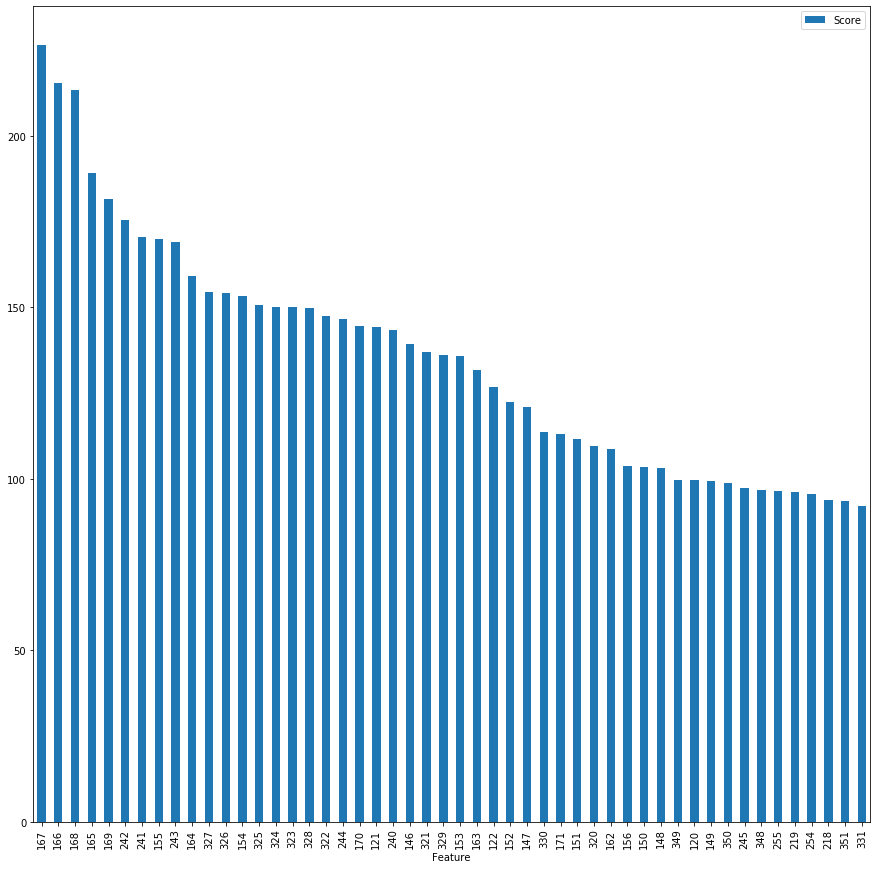

In [8]:
#Plotting features vs score
test_f=featureScores.nlargest(50,'Score')
test_f.plot(x='Feature',y='Score',kind='bar',figsize=(15,15))

In [9]:
cnTrainX=cnTrainX[[167,166,168,165,169,242,241,155,243,164,327,326,154,325,324,323,328,322,244,170,121,240,146]]
cnTrainX

,167,166,168,165,169,242,241,155,243,164,...,325,324,323,328,322,244,170,121,240,146
0,-0.025296,-0.028201,-0.022547,-0.031047,-0.020042,0.020918,0.023118,-0.006945,0.017326,-0.033521,...,-0.001647,-0.001873,-0.002055,-0.000922,-0.002170,0.012557,-0.017808,0.011860,0.024104,0.022349
1,-0.022847,-0.025850,-0.020092,-0.028922,-0.017622,0.019583,0.022040,-0.010263,0.015846,-0.031766,...,-0.001489,-0.001710,-0.001900,-0.000770,-0.002024,0.010976,-0.015456,0.013600,0.023318,0.018778
2,-0.022247,-0.024786,-0.019858,-0.027304,-0.017663,0.018352,0.020708,-0.010392,0.014886,-0.029552,...,-0.001308,-0.001517,-0.001685,-0.000662,-0.001816,0.010501,-0.015685,0.014121,0.021980,0.019253
3,-0.021729,-0.023896,-0.019644,-0.025989,-0.017694,0.017490,0.020156,-0.012160,0.013869,-0.027819,...,-0.001186,-0.001390,-0.001569,-0.000586,-0.001711,0.009452,-0.015905,0.013276,0.021925,0.019010
4,-0.024129,-0.027197,-0.021275,-0.030299,-0.018722,0.020181,0.022192,-0.007421,0.016764,-0.033120,...,-0.001660,-0.001884,-0.002048,-0.000884,-0.002129,0.012165,-0.016466,0.012804,0.022987,0.021033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,-0.024672,-0.027662,-0.021845,-0.030626,-0.019285,0.020558,0.022612,-0.007559,0.017141,-0.033252,...,-0.001633,-0.001856,-0.002025,-0.000893,-0.002116,0.012556,-0.017004,0.013077,0.023468,0.021202
129,-0.021631,-0.024007,-0.019345,-0.026343,-0.017230,0.017744,0.020058,-0.011232,0.014375,-0.028413,...,-0.001241,-0.001436,-0.001593,-0.000634,-0.001701,0.010116,-0.015314,0.014457,0.021401,0.018129
130,-0.022925,-0.025754,-0.020283,-0.028577,-0.017893,0.019111,0.021294,-0.009276,0.015680,-0.031148,...,-0.001474,-0.001686,-0.001849,-0.000779,-0.001945,0.011200,-0.015770,0.014228,0.022367,0.018826
131,-0.023531,-0.026389,-0.020857,-0.029238,-0.018428,0.019664,0.021858,-0.008624,0.016181,-0.031794,...,-0.001534,-0.001743,-0.001908,-0.000850,-0.002003,0.011612,-0.016268,0.013496,0.022898,0.019969


In [23]:
#Splitting the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(cnTrainX,cnTrainY,test_size=0.3,train_size=0.7,shuffle=True)

In [24]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [25]:
#implementing the Different algorithms
test=[(KNeighborsRegressor(n_neighbors=10)),(LinearRegression()),(RandomForestRegressor(n_estimators = 500, random_state = 0)),(Ridge(alpha=0.01)),(Lasso(alpha=0.01))]
for model in test: 
    cv_error=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    print('Mean and SD of cross validation',np.mean(cv_error),np.std(cv_error))

Mean and SD of cross validation -5.992735438596489 2.442037045478735
Mean and SD of cross validation -5.663863495514645 0.9493895156282576
Mean and SD of cross validation -4.496472741894759 0.283154244967059
Mean and SD of cross validation -4.365899098731655 0.6303081406033609
Mean and SD of cross validation -4.263294831151315 0.4632853146458038


In [26]:
regressor=KNeighborsRegressor(n_neighbors=10)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6754999999999995
Mean Squared Error: 4.191834999999997
Root Mean Squared Error: 2.0473971280628476


In [27]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8411918633482447
Mean Squared Error: 5.166192076608688
Root Mean Squared Error: 2.2729258845392843


In [28]:
regressor=RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9166949999999723
Mean Squared Error: 5.51408887099989
Root Mean Squared Error: 2.348209716145449


In [29]:
regressor=Lasso()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6191600580998355
Mean Squared Error: 3.9419961647439608
Root Mean Squared Error: 1.9854460870907478


In [31]:
#Selecting the best algorithm 
regressor=Ridge()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6191600580998355
Mean Squared Error: 3.9419961647439608
Root Mean Squared Error: 1.9854460870907478


In [32]:
#Implement the hyperparameter tuning
parameters={'alpha':[1e-15,1e-12,1e-5,0.1,5,10,20]}
rf_random = GridSearchCV(regressor,parameters,cv=5)
# Fit the random search model
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

{'alpha': 20}


In [33]:
regressor=Lasso(alpha=0.1)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.596881096381643
Mean Squared Error: 3.7716334661366444
Root Mean Squared Error: 1.9420693772717401
